In [13]:
import sys
sys.path.append("..")

In [14]:
import pandas as pd
from ratesy.ratesData import ratesData
from ratesy.models import Vasiceck, Normal,Merton
import matplotlib.pyplot as plt

In [15]:
# Read data 
df = pd.read_excel(r".\Assignment_06_Data.xlsx",sheet_name = 'Sheet1')
rd = ratesData(df,starting_column_name="cmt",conversion=1/100)
print(df.head())


   year  month  day  ignore  cms0.25   cms2   cms3   cms5   cms7  cms10  \
0  1988      1    8       1    7.375  8.532  8.952  9.376  9.693  9.874   
1  1988      1   15       1    7.250  8.229  8.613  8.975  9.278  9.461   
2  1988      1   22       1    7.125  8.128  8.509  8.831  9.128  9.324   
3  1988      1   29       1    6.875  7.871  8.233  8.588  8.905  9.110   
4  1988      2    5       1    6.813  7.794  8.016  8.466  8.781  8.959   

   cmt0.25  cmt2  cmt3      cmt5  cmt7  cmt10  
0     6.75  7.92  8.16  8.479999  8.80   8.97  
1     6.75  7.61  7.83  8.130000  8.42   8.60  
2     6.70  7.51  7.73  8.010000  8.29   8.49  
3     6.60  7.22  7.48  7.760000  8.06   8.26  
4     6.40  7.10  7.32  7.640000  7.95   8.12  


# Vasiceck  Model Fitting

## Fit the model

In [16]:
vs = Vasiceck(rd)
result = vs.optimize_func()

## Get the model intrest rates from fitted data

In [17]:
df_vasi = vs.step().data
print(df_vasi.head())

    par_2.0   par_3.0   par_5.0   par_7.0  par_10.0
0  0.071120  0.072064  0.073354  0.074159  0.074891
1  0.071120  0.072064  0.073354  0.074159  0.074891
2  0.070696  0.071682  0.073036  0.073888  0.074665
3  0.069849  0.070919  0.072401  0.073345  0.074215
4  0.068157  0.069393  0.071133  0.072260  0.073316


# Merton Model 

## Fit the Merton Model

In [18]:
mr = Merton(rd)
result = mr.optimize_func()

## Get the model interest rates

In [19]:
df_merton = mr.step().data
print(df_merton.head())


    par_2.0   par_3.0   par_5.0   par_7.0  par_10.0
0  0.073196  0.074865  0.077590  0.079562  0.081294
1  0.073196  0.074865  0.077590  0.079562  0.081294
2  0.072678  0.074348  0.077074  0.079048  0.080782
3  0.071644  0.073313  0.076042  0.078019  0.079757
4  0.069575  0.071246  0.073980  0.075963  0.077709


# Normal Model

## Fit the merton model

In [20]:
nr = Normal(rd)
result = nr.optimize_func()

# Get the model Intrest rates

In [21]:
df_normal = nr.step().data
print(df_normal.head())


    par_2.0   par_3.0   par_5.0   par_7.0  par_10.0
0  0.068652  0.068652  0.068652  0.068652  0.068652
1  0.068652  0.068652  0.068652  0.068652  0.068652
2  0.068135  0.068135  0.068135  0.068135  0.068135
3  0.067101  0.067101  0.067101  0.067101  0.067101
4  0.065035  0.065035  0.065035  0.065035  0.065035


In [22]:
df_actual = rd.data

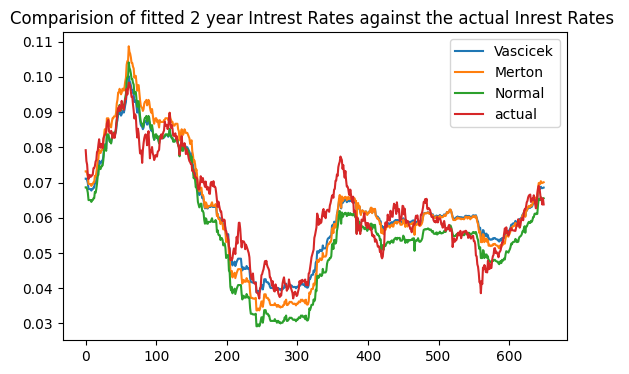

In [23]:
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(df_vasi.index,df_vasi['par_2.0'], label="Vascicek")
ax.plot(df_merton.index,df_merton['par_2.0'], label="Merton")
ax.plot(df_normal.index,df_normal['par_2.0'], label="Normal")
ax.plot(df_actual.index,df_actual['cmt2.0'], label="actual")
ax.set_title("Comparision of fitted 2 year Intrest Rates against the actual Inrest Rates ")
ax.legend()